In [27]:
!pip install -r requirements.txt --upgrade --user

  Using cached ipython-8.1.1-py3-none-any.whl (750 kB)
  Using cached torch-1.11.0-cp39-cp39-win_amd64.whl (157.9 MB)
  Using cached torchvision-0.12.0-cp39-cp39-win_amd64.whl (1.0 MB)
  Using cached stack_data-0.2.0-py3-none-any.whl (21 kB)

In [28]:
import os
import requests
import shutil
import fastai
print(fastai.__version__) # should be 2.0.0

# from fastai.basic_train import Learner, load_learner
from fastai.data.block import DataBlock, CategoryBlock
# from fastai.data.block import CategoryBlock
from fastai.data.transforms import get_image_files, parent_label, RandomSplitter
from fastai.interpret import ClassificationInterpretation, plot_top_losses
from fastai.metrics import error_rate
from fastai.vision import widgets
from fastai.vision.augment import aug_transforms, Resize, ResizeMethod, RandomResizedCrop
from fastai.vision.core import PILImage
from fastai.vision.data import ImageBlock
from fastai.vision.learner import cnn_learner
from fastai.vision.utils import download_images, verify_images
from fastai.vision.widgets import ImageClassifierCleaner
from fastcore.foundation import L
from fastcore.xtras import is_listy
from fastdownload import download_url
from ipywidgets import VBox
from PIL import Image
from pathlib import Path
from torch import Tensor
from torchvision.models import resnet18
from types import SimpleNamespace

# import matplotlib as mpl, pkgutil, requests, time
# from fastcore.foundation import *
# from fastai import *
# from fastai.vision import *
# from fastai.vision.data import download_images
# from concurrent.futures import as_completed
# from fastdownload import download_url
# from pandas.api.types import CategoricalDtype
# from scipy.cluster import hierarchy as hc
# from io import StringIO, BytesIO
# from urllib.error import  URLError, HTTPError


  Using cached pure_eval-0.2.2-py3-none-any.whl (11 kB)
  Using cached executing-0.8.3-py2.py3-none-any.whl (16 kB)
  Using cached asttokens-2.0.5-py2.py3-none-any.whl (20 kB)
2.5.5


In [29]:
key = os.environ.get('AZURE_SEARCH_KEY', '44b6f2e1fdac44dfbf8d84e8d0a20eff')

In [30]:
def search_images_bing(key, term, min_sz=128, max_images=150):
    params = dict(q=term, count=max_images, min_height=min_sz, min_width=min_sz)
    search_url = "https://api.bing.microsoft.com/v7.0/images/search"
    response = requests.get(search_url, headers={"Ocp-Apim-Subscription-Key":key}, params=params)
    response.raise_for_status()
    return L(response.json()['value'])

In [31]:
search_images_bing

<function __main__.search_images_bing(key, term, min_sz=128, max_images=150)>

In [32]:
results = search_images_bing(key, 'koala')
ims = results.attrgot('contentUrl')
len(ims)

150

In [33]:
dest = 'images/koala.jpg'
download_url(ims[0], dest)

Path('images/koala.jpg')

In [34]:
im = Image.open(dest)
MAX_SIZE = (128, 128)  
im.thumbnail(MAX_SIZE)
  
# creating thumbnail
im.save('images/koala_thumb.jpg')
im.show()

In [35]:
animal_types = "Feathertail Glider","Rufous Bettong","Kultarr","Rusty Antechinus","Agile Antechinus","Silver-headed Antechinus","Black-tailed Antechinus","Fawn Antechinus","Yellow-footed Antechinus","Atherton Antechinus","Cinnamon Antechinus","Swamp Antechinus","Buff-footed Antechinus","Brown Antechinus","Subtropical Antechinus","Dusky Antechinus","Long-nosed Fur Seal","Antarctic fur seal","Australian Fur-seal","subantarctic fur-seal","White-striped Freetail-bat","Chital","Hog Deer","rorquals","Dwarf Minke Whale","Antarctic minke whale","Sei Whale","Bryde's Whale","blue whale","Fin Whale","Arnoux's beaked whale","Tasmanian Bettong","Burrowing Bettong","Brush-tailed Bettong","Northern Bettong","Banteng","European Cattle","Swamp Buffalo","Mountain Pygmy-possum","Dromedary","Dingo","Pygmy Right Whale","Goat","Long-tailed Pygmy Possum","Western Pygmy-possum","Little Pygmy-possum","Eastern Pygmy-possum","Red Deer","Rusa Deer","Sambar","Northern Mastiff Bat","Pig-footed Bandicoot","Large Pied Bat","Gould's Wattled Bat","Chocolate Wattled Bat","Hoary Wattled Bat","Little Pied Bat","White-footed Tree-rat","Brush-tailed Tree-rat","dolphins","Striped Possum","Fallow Deer","Brush-tailed Mulgara","Crest-tailed Mulgara","Little Red Kaluta","Kowari","Chuditch","Northern Quoll","Bindjulang","Eastern Quoll","common dolphin","Bennett's Tree-kangaroo","Lumholtz's Tree-kangaroo","Bare-backed Fruit-bat","dugong","Rufous Spiny Bandicoot","Donkey","Horse","Southern Right Whale","Eastern False Pipistrelle","Cat","pygmy killer whale","Northern Palm Squirrel","Short-finned Pilot Whale","long-finned pilot whale","grampus","Leadbeater's Possum","Lemuroid Ringtail Possum","Dusky Leafnosed-bat","Fawn Leafnosed-bat","Diadem Leaf-nosed Bat","Arnhem Leaf-nosed Bat","Semon's Leaf-nosed Bat","Northern Leaf-nosed Bat","Water-rat","leopard seal","Southern Bottle-nosed Whale","Musky Rat-kangaroo","Golden Bandicoot","Northern Brown Bandicoot","Southern Brown Bandicoot","pygmy sperm whale","Dwarf Sperm Whale","Fraser's dolphin","Hourglass Dolphin","Dusky Dolphin","Spectacled Hare-wallaby","Mala","Eastern Hare-wallaby","Banded Hare-wallaby","Northern Hairy-nosed Wombat","Southern Hairy-nosed Wombat","Forrest's Mouse","Lakeland Downs Mouse","Lesser Stick-nest Rat","Greater Stick-nest Rat","Weddell seal","Brown Hare","Southern Right Whale Dolphin","Crab-eater Seal","Ghost Bat","Northern Blossom-bat","Western Grey Kangaroo","Eastern Grey Kangaroo","Bilby","Lesser Bilby","Broad-toothed Rat","humpback whale","Grassland Melomys","Cape York Melomys","Fawn-footed Melomys","Bramble Cay Melomys","Black-footed Tree-rat","Golden-backed Tree-rat","beaked whales","Andrews' beaked whale","Blainville's Beaked Whale","Ginkgo-toothed Beaked Whale","Gray's Beaked Whale","Strap-toothed Beaked Whale","True's Beaked Whale","Eastern Freetail-bat","Little Bentwing-bat","Northern Bentwing-bat","Southern Bent-winged Bat","Eastern Bent-winged Bat","Southern Elephant Seal","Tube-nosed Bat","House Mouse","Southern Myotis","Numbat","Australian Sea-lion","Wongai Ningaui","Southern Ningaui","Agile Wallaby","Black-striped Wallaby","Tammar Wallaby","Western Brush Wallaby","Parma Wallaby","Whiptail Wallaby","Red-necked Wallaby","Spinifex Hopping-mouse","Short-tailed Hopping-mouse","Northern Hopping-mouse","Fawn Hopping-mouse","Dusky Hopping-mouse","Long-tailed Hopping-mouse","Mitchell's Hopping Mouse","Central Marsupial Mole","Eastern Tube-nosed Bat","Arnhem Long-eared Bat","Eastern Long-eared Bat","Corben's Long-eared Bat","Pallid Long-eared Bat","Lesser Long-eared Bat","Gould's Long-eared Bat","Greater Long-eared Bat","Tasmanian Long-eared Bat","Pygmy Long-eared Bat","eared seals","Ross Seal","Bridled Nailtail Wallaby","Crescent Nailtail Wallaby","Northern Nailtail Wallaby","Australian snubfin dolphin","Killer Whale","Platypus","Rabbit","Antilopine Wallaroo","Black Wallaroo","Common Wallaroo","Red Kangaroo","North-western Free-tailed Bat","Cape York Free-tailed Bat","South-western Free-tailed Bat","Northern Free-tailed Bat","Inland Free-tailed Bat","Little Mastiff-bat","Ride's Free-tailed Bat","seals","Dibbler","melon-headed whale","Western Barred Bandicoot","Desert Bandicoot","Eastern Barred Bandicoot","Greater Glider","Yellow-bellied Glider","Sugar Glider","Sugar Glider","Mahogany Glider","Squirrel Glider","Allied Rock-wallaby","Short-eared Rock-wallaby","Warabi","Cape York Rock-wallaby","Nabarlek","Godman's Rock-wallaby","Herbert's Rock-wallaby","Unadorned Rock-wallaby","Black-footed Rock-wallaby","Mareeba Rock-wallaby","Brush-tailed Rock-wallaby","Proserpine Rock-wallaby","Rothschild's Rock-wallaby","Sharman's Rock-wallaby","Eastern Short-eared Rock-wallaby","Yellow-footed Rock-wallaby","Rock Ringtail Possum","Grey Cuscus","Red-tailed Phascogale","Brush-tailed Phascogale","Koala","Golden-tipped Bat","Sperm Whale","Cape York Pipistrelle","Northern Pipistrelle","Paucident Planigale","Long-tailed Planigale","Common Planigale","Narrow-nosed Planigale","Long-footed Potoroo","Long-nosed Potoroo","Northern Dibbler","Fat-tailed Pseudantechinus","Carpentarian Pseudantechinus","Ningbing Pseudantechinus","Common Ringtail Possum","Green Ringtail Possum","Daintree River Ringtail Possum","Herbert River Ringtail Possum","Ash-grey Mouse","Silky Mouse","Plains Rat","Bolam's Mouse","Kakadu Pebble-mound Mouse","Pebble-mound Mouse","Delicate Mouse","Desert Mouse","Shark Bay Mouse","Smoky Mouse","Gould's Mouse","Eastern Chestnut Mouse","Sandy Inland Mouse","Long-tailed Mouse","Central Pebble-mound Mouse","Western Chestnut Mouse","New Holland Mouse","Hastings River Mouse","North-eastern Mouse","Heath Rat","false killer whale","Black Flying-fox","Spectacled Flying-fox","Grey-headed Flying-fox","Little Red Flying-fox","Dusky Rat","Pacific Rat","Bush Rat","Cape York Rat","Swamp Rat","Brown Rat","Black Rat","Canefield Rat","Pale Field-rat","Long-haired Rat","Eastern Horseshoe-bat","Orange Leaf-nosed Bat","Yellow-bellied Sheathtail-bat","Papuan Sheathtail-bat","Bare-rumped Sheathtail-bat","Tasmanian Devil","Eastern Grey Squirrel","Greater Broad-nosed Bat","Inland Broad-nosed Bat","Little Broad-nosed Bat","Eastern Broad-nosed Bat","Northern Broad-nosed Bat","Hairy-nosed Freetail-bat","Quokka","Chestnut Dunnart","Kakadu Dunnart","Butler's Dunnart","Fat-tailed Dunnart","Little Long-tailed Dunnart","Julia Creek Dunnart","Dusky Dunnart","Gilbert's Dunnart","Hairy-footed Dunnart","White-footed Dunnart","Long-tailed Dunnart","Stripe-faced Dunnart","Common Dunnart","Ooldea Dunnart","Sandhill Dunnart","Red-cheeked Dunnart","Lesser Hairy-footed Dunnart","Indo-pacific Hump-backed Dolphin","Australian humpbacked dolphin","Common Spotted Cuscus","Spotted Dolphin","striped dolphin","Spinner Dolphin","Dwarf Spinner Dolphin","Rough-toothed Dolphin","Pig","Common Blossom-bat","Short-beaked Echidna","Coastal Sheathtail-bat","Common Sheathtail-bat","Hill's Sheathtail-bat","Arnhem Sheathtail-bat","Troughton's Sheathtail-bat","Honey Possum","Tasman Beaked Whale","Thylacine","Tasmanian Pademelon","Red-legged Pademelon","Red-necked Pademelon","Mountain Brushtail Possum","Common Brushtail Possum","Indian Ocean bottlenose dolphin","burrunan dolphin","bottle-nosed dolphin","White-tailed Uromys","Thornton Peak Uromys","Inland Forest Bat","Northern Cave Bat","Large Forest Bat","Yellow-lipped Cave Bat","Finlayson's Cave Bat","Eastern Forest Bat","Southern Forest Bat","Eastern Cave Bat","Little Forest Bat","Common Wombat","Fox","Swamp Wallaby","Scaly-tailed Possum","False Water-rat","beaked whales","Cuvier's Beaked Whale","Common Rock-rat","Arnhem Land Rock-rat","Carpentarian Rock-rat","Central Rock-rat","Large Rock-rat"
path = Path('animal')

In [36]:
# Download image library
sync_command = f"aws s3 sync s3://ml-factory-jptest01-prod/animal/ ./animal/"
os.system(sync_command)

1

In [37]:
if not path.exists():
    path.mkdir()
for o in animal_types:
    dest = (path/o)
    if not dest.exists():
        print(o)
        dest.mkdir()
        results = search_images_bing(key, f'{o} animal')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [38]:
fns = get_image_files(path)
fns

(#51332) [Path('animal/Agile Antechinus/00000000.jpg'),Path('animal/Agile Antechinus/00000001.jpg'),Path('animal/Agile Antechinus/00000002.jpg'),Path('animal/Agile Antechinus/00000003.jpg'),Path('animal/Agile Antechinus/00000004.jpg'),Path('animal/Agile Antechinus/00000005.jpg'),Path('animal/Agile Antechinus/00000006.jpg'),Path('animal/Agile Antechinus/00000008.jpg'),Path('animal/Agile Antechinus/00000009.jpg'),Path('animal/Agile Antechinus/00000010.jpg')...]

In [39]:
failed = verify_images(fns)
failed

(#2) [Path('animal/Large Pied Bat/00000105.jpg'),Path('animal/White-footed Tree-rat/00000123.jpg')]

In [40]:
failed.map(Path.unlink);

In [41]:
# Upload image library
sync_command = f"aws s3 sync ./animal/ s3://ml-factory-jptest01-prod/animal/ --delete"
os.system(sync_command)

0

In [42]:
animals = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [43]:
dls = animals.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


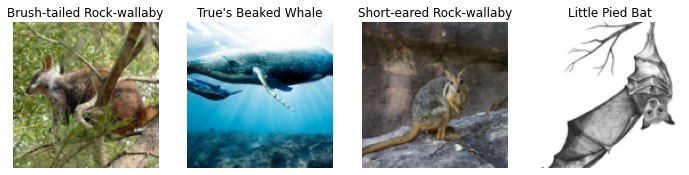

In [44]:
dls.valid.show_batch(max_n=4, nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


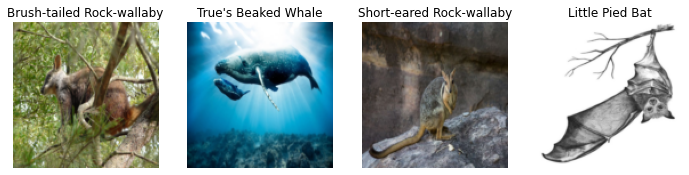

In [45]:
animals = animals.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = animals.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


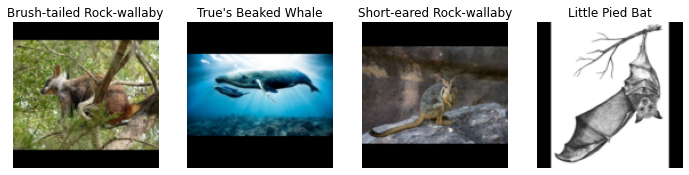

In [46]:
animals = animals.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = animals.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


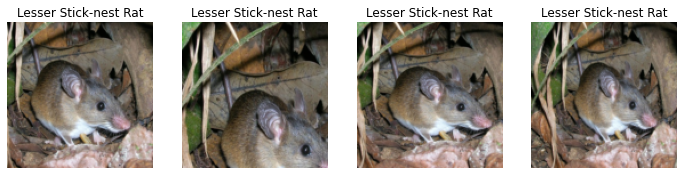

In [47]:
animals = animals.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = animals.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


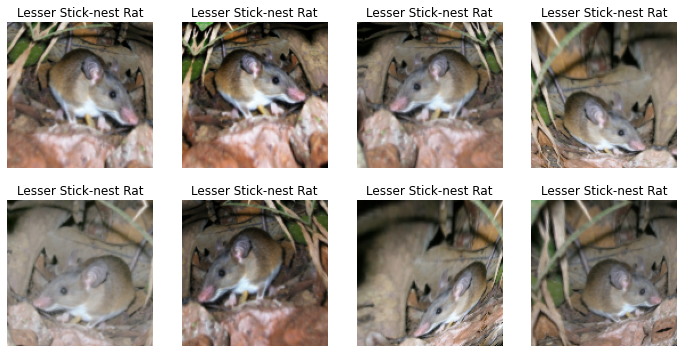

In [48]:
animals = animals.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = animals.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [49]:
animals = animals.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = animals.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [53]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
def plot_top_losses_fix(interp, k, largest=True, **kwargs):
        losses,idx = interp.top_losses(k, largest)
        if not isinstance(interp.inputs, tuple): interp.inputs = (interp.inputs,)
        if isinstance(interp.inputs[0], Tensor): inps = tuple(o[idx] for o in interp.inputs)
        else: inps = interp.dl.create_batch(interp.dl.before_batch([tuple(o[i] for o in interp.inputs) for i in idx]))
        b = inps + tuple(o[idx] for o in (interp.targs if is_listy(interp.targs) else (interp.targs,)))
        x,y,its = interp.dl._pre_show_batch(b, max_n=k)
        b_out = inps + tuple(o[idx] for o in (interp.decoded if is_listy(interp.decoded) else (interp.decoded,)))
        x1,y1,outs = interp.dl._pre_show_batch(b_out, max_n=k)
        if its is not None:
            #plot_top_losses(x, y, its, outs.itemgot(slice(len(inps), None)), L(self.preds).itemgot(idx), losses,  **kwargs)
            plot_top_losses(x, y, its, outs.itemgot(slice(len(inps), None)), interp.preds[idx], losses,  **kwargs)
        #TODO: figure out if this is needed
        #its None means that a batch knows how to show itself as a whole, so we pass x, x1
        #else: show_results(x, x1, its, ctxs=ctxs, max_n=max_n, **kwargs)

In [ ]:
# interp.plot_top_losses(5, nrows=1)
plot_top_losses_fix(interp, 10, nrows=2)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)
for idx,cat in cleaner.change():
    try:
        shutil.move(str(cleaner.fns[idx]), path/cat)
    except:
        new_fname = str(cleaner.fns[idx]).split(".")[0] +"moved."+ str(cleaner.fns[idx]).split(".")[1]
        os.rename(str(cleaner.fns[idx]), new_fname)
        shutil.move(new_fname, path/cat)

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

In [ ]:
from fastai.learner import load_learner

learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('images/koala.jpg')

In [ ]:
learn_inf.dls.vocab

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

In [ ]:
btn_upload = SimpleNamespace(data = ['images/koala.jpg'])

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select your animal!'),
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila